In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [5]:
df1 = pd.read_csv('/kaggle/input/dataset-emotion/anger.csv')
num_classes_anger = len(df1.index)
df2 = pd.read_csv('/kaggle/input/dataset-emotion/disgust.csv')
num_classes_disgut = len(df2.index)
df3 = pd.read_csv('/kaggle/input/dataset-emotion/fear.csv')
num_classes_fear = len(df3.index)
df4 = pd.read_csv('/kaggle/input/dataset-emotion/joy.csv')
num_classes_joy = len(df4.index)
df5 = pd.read_csv('/kaggle/input/dataset-emotion/sad.csv')
num_classes_sad = len(df5.index)
df6 = pd.read_csv('/kaggle/input/dataset-emotion/surprise.csv')
num_classes_surprise = len(df6.index)


In [8]:
df_all = pd.concat( 
    map(pd.read_csv, ['/kaggle/input/dataset-emotion/anger.csv', '/kaggle/input/dataset-emotion/disgust.csv','/kaggle/input/dataset-emotion/fear.csv', '/kaggle/input/dataset-emotion/joy.csv','/kaggle/input/dataset-emotion/sad.csv' , '/kaggle/input/dataset-emotion/surprise.csv']), ignore_index=True) 
df_all.head(10)

,tweet,replyCount,retweetCount,likeCount,quoteCount,hashtags,sourceLabel,emotion
0,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...,0,3,2,0,['No2IR'],Twitter Web App,anger
1,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...,0,0,8,0,['سين_کاف'],Twitter for Android,anger
2,پدر سوخته ای که بابام بهم میگه دو معنی داره که...,1,0,11,0,['پدر_ایرانی'],Twitter for Android,anger
3,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...,0,0,1,0,"['جذبه', 'اخم']",Twitter for iPhone,anger
4,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...,4,6,36,0,['نبأ_عظیم'],Twitter Web App,anger
5,صحبتاى مددى و خوندم يه علامت سوال بزرگ تو ذهنم...,0,2,23,0,['مجيدى_تنها_نيست'],Twitter for iPhone,anger
6,میدونی دوست ندارم کارهای خیرخواهانه تو رو زیاد...,0,10,10,0,"['鹿晗', 'LuHan']",Twitter for Android,anger
7,دلم برای #محسن_رضایی_میرقائد میسوزه. بیخود و ب...,0,0,7,0,['محسن_رضایی_میرقائد'],Twitter Web App,anger
8,«آیا قوز کرده‌اید؟ آیا اخم کرده‌اید؟ آیا خطوط ...,0,1,36,1,['توئیت_جدی'],Twitter Web App,anger
9,تجربه کاربری جدیدی در اکالا آنلاک شد!‌\nاگر رو...,1,0,4,0,"['اکالا', 'okala']",Twitter Web App,anger


<BarContainer object of 6 artists>

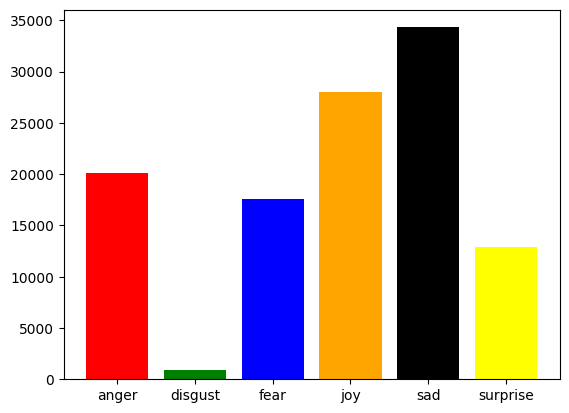

In [6]:
fig, ax = plt.subplots()

emothions = ['anger', 'disgust', 'fear', 'joy', 'sad', 'surprise']
counts = [num_classes_anger, num_classes_disgut, num_classes_fear, num_classes_joy,num_classes_sad ,num_classes_surprise ]

bar_colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow']

ax.bar(emothions, counts , color=bar_colors)

In [9]:
df_all['tweet'][0]

'دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کننده س و سبزه. کورمال کورمال گوشیمو پیدا کردم عکس بگیرم و در عین حال دیدم خمینی ملعون آفتابه به دست داره میره ته دره، اخم کرده بود. آخرین باری که دیدم خامنه ای تو خوابم اخم کرده قاسم کتلت شد....حالا ببینیم این خواب چی میشه!😏\n#No2IR'

In [10]:
df_all['tweet'][6]

'میدونی دوست ندارم کارهای خیرخواهانه تو رو زیاد بفهمن-\nچون بعدش میترسم آدمای بد اذیتت کنه-\nبعدش میدونی من مطمئنم پدرتون شب ها که همه خوابن یواشکی گوشی و هندزفریشو برمی\u200cداره -\nو یه گوشه اونقد غرق تو میشه و بهت افتخار میکنه و اخم میکنه تا اشکاش از چشماش سرازیر نشه-\n#鹿晗 #LuHan https://t.co/NPBL2OWev2'

Remove tags and URLs

In [11]:
import re

def remove_html_tags_and_urls(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    return text

df_all['tweet'] = df_all['tweet'].apply(remove_html_tags_and_urls)


In [11]:
df_all['tweet'][3]

'با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ات است نه در چشمانت. بگذار خود واقعیت جذبه را نقش دهد.\n( عکس ها کپی شده) #جذبه #اخم '

In [12]:
df_all['tweet'][0]

'دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کننده س و سبزه. کورمال کورمال گوشیمو پیدا کردم عکس بگیرم و در عین حال دیدم خمینی ملعون آفتابه به دست داره میره ته دره، اخم کرده بود. آخرین باری که دیدم خامنه ای تو خوابم اخم کرده قاسم کتلت شد....حالا ببینیم این خواب چی میشه!😏\n#No2IR'

# section for stopwords

In [13]:
def read_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f]
    return stopwords

# Example usage:
stopwords_file = '/kaggle/input/persian-stopwords/Pesian_Stop_Words_List.txt'
persian_stopwords = read_stopwords(stopwords_file)


In [14]:
import re

def remove_stopwords(text):
#     # Tokenize the text into words
#     words = re.findall(r'\b\w+\b', text, flags=re.UNICODE)

#     # Remove stopwords
#     filtered_words = [word for word in words if word not in stopwords]

    cleaned_text = ' '.join([word for word in text.split() if word not in persian_stopwords])
    return cleaned_text

In [15]:
df_all['tweet']= df_all['tweet'].apply(remove_stopwords)


In [12]:
df_all['tweet'][6]

'میدونی دوست کارهای خیرخواهانه زیاد بفهمن- بعدش میترسم آدمای اذیتت کنه- بعدش میدونی مطمئنم پدرتون شب خوابن یواشکی گوشی هندزفریشو برمی\u200cداره - یه گوشه اونقد غرق میشه بهت افتخار میکنه اخم میکنه اشکاش چشماش سرازیر نشه- #鹿晗 #LuHan'

In [16]:
df_all['tweet'][3]

'مواجه اخم نکنید. اقتدار ات چشمانت. بگذار واقعیت جذبه نقش دهد. ( عکس کپی شده) #جذبه #اخم'

# section for emojis


In [9]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import emoji

def replace_emojis_with_persian_text(text):
    # Replace emojis with their textual equivalents (using Persian language)
    return emoji.demojize(text, language='fa')

df_all['tweet']= df_all['tweet'].apply(replace_emojis_with_persian_text)



In [24]:
df_all['tweet'][0]

'دیشب خواب دیدم بمبی زدن نورش خیره س سبزه. کورمال کورمال گوشیمو عکس عین دیدم خمینی ملعون آفتابه دست داره میره ته دره، اخم بود. آخرین باری دیدم خامنه خوابم اخم قاسم کتلت شد....حالا ببینیم خواب چی میشه!:پوزخند: '

In [19]:
pip install parsivar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.5 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [20]:
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger


# Stemming
my_stemmer = FindStems()
stem = my_stemmer.convert_to_stem
df_all['tweet'] =df_all['tweet'].apply(stem)


In [21]:
df_all['tweet'][4]

'مدح شادی غم نوشتند برایت نوشتند خنده لبت، تصنیف اخم صد غزل ماتم نوشتند سید محمدمهدی شفیعی #نبأ_عظیم'

# spellchecker and correct them

In [ ]:
import shutil
import os

# Define the source path of your file (the location where you uploaded your file)
source_path = '/kaggle/input/for-parsivar/mybigram_lm.pckl'  # Change 'yourfile.txt' to your file name

# Define the destination path where you want to copy your file
destination_path = '/opt/conda/lib/python3.10/site-packages/parsivar/resource/mybigram_lm.pckl'  # Change 'yourfile.txt' to your file name

# Make sure the destination directory exists, if not, create it
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Copy the file
shutil.copyfile(source_path, destination_path)

In [ ]:
import shutil
import os

# Define the source path of your file (the location where you uploaded your file)
source_path = '/kaggle/input/for-parsivar/onegram.pckl'  # Change 'yourfile.txt' to your file name

# Define the destination path where you want to copy your file
destination_path = '/opt/conda/lib/python3.10/site-packages/parsivar/resource/onegram.pckl'  # Change 'yourfile.txt' to your file name

# Make sure the destination directory exists, if not, create it
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Copy the file
shutil.copyfile(source_path, destination_path)

In [ ]:
from parsivar import SpellCheck
myspell_checker = SpellCheck()



# remove hashtags from tweet


In [22]:
import re

def remove_hashtags(text):
    """
    Removes hashtags (including the '#' symbol) from the input text.
    """
    cleaned_text = re.sub(r'#\w+', '', text)
    return cleaned_text


In [23]:
df_all['tweet']=df_all['tweet'].apply(remove_hashtags)



In [ ]:
import pandas as pd
from khoshnevis import Normalizer

def clean_persian_text(df, column_name):
    """
    Cleans Persian text by removing specific characters from a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the Persian text.
    column_name (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The DataFrame with the cleaned text.
    """
    normalizer = Normalizer()
    
    df[column_name] = df[column_name].apply(lambda text: normalizer.normalize(text=text))
    df[column_name] = df[column_name].str.replace('\u200c', ' ', regex=False)
    df[column_name] = df[column_name].str.replace('\\', ' ', regex=False)
    df[column_name] = df[column_name].str.replace('\n', ' ', regex=False)
    
    return df

cleaned_df = clean_persian_text(df_all, 'tweet')


In [ ]:
pip install khoshnevis

In [14]:
df_all['tweet'][6]

'میدونی دوست ندارم کارهای خیرخواهانه تو رو زیاد بفهمن-\nچون بعدش میترسم آدمای بد اذیتت کنه-\nبعدش میدونی من مطمئنم پدرتون شب ها که همه خوابن یواشکی گوشی و هندزفریشو برمی\u200cداره -\nو یه گوشه اونقد غرق تو میشه و بهت افتخار میکنه و اخم میکنه تا اشکاش از چشماش سرازیر نشه-\n  '

In [19]:
import torch
from transformers import AutoModel, AutoTokenizer
import gc  # Ga

In [5]:
pip install ipywidgets

/usr/local/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
# creating a map list for labels and label_ids
all_labels = list(sorted(df_all['emotion'].unique()))
label2id = {label: i for i, label in enumerate(all_labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')
y_df = df_all['emotion']

label2id: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sad': 4, 'surprise': 5}
id2label: {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'joy', 4: 'sad', 5: 'surprise'}


In [32]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")


In [28]:
def tokenize_and_pad(text):
    return tokenizer.encode(text, max_length=32, pad_to_max_length=True, truncation=True)

In [27]:
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=32, padding='max_length', truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()

    return embeddings[:, :120]


In [29]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


# this part for embedding

In [33]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

NameError: name 'AutoModel' is not defined

In [34]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
import gc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
model = AutoModel.from_pretrained("HooshvareLab/bert-fa-zwnj-base").to(device)
model.eval()  

max_length = 32
batch_size = 512  # Define batch size for batch processing

def tokenize_and_pad_batch(texts, tokenizer, max_length, device):
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokens.to(device)

# Function to get embeddings
def get_embeddings(tokens, model):
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state
    return embeddings

# Function to process a DataFrame column and get embeddings in batches
def process_dataframe(df, column_name, tokenizer, model, max_length, batch_size, device):
    embeddings_list = []
    for i in range(0, len(df), batch_size):
        batch_texts = df[column_name].iloc[i:i+batch_size].tolist()
        tokens = tokenize_and_pad_batch(batch_texts, tokenizer, max_length, device)
        embeddings = get_embeddings(tokens, model)
        embeddings = embeddings[:, :max_length, :120] 
        embeddings_list.append(embeddings)
        del tokens
        del embeddings
        gc.collect()  # Free up memory

    return torch.cat(embeddings_list, dim=0)



x_embedding = process_dataframe(df_all, 'tweet', tokenizer, model, max_length, batch_size, device)
print(x_embedding.shape)

pytorch_model.bin:   0%|          | 0.00/473M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([113829, 32, 120])


In [35]:
torch.save(x_embedding, 'final_embeddings.pt')



In [36]:
y = df_all['emotion'].map(label2id)


# train test validation split

In [37]:
from sklearn.model_selection import train_test_split 


In [38]:
x_train , x_test, y_train , y_test = train_test_split(x_embedding, y , test_size =0.3, random_state = 0, shuffle =True)


In [39]:
print(y_train.shape)
print(x_train.shape)

(79680,)
torch.Size([79680, 32, 120])


In [40]:
x_train_new , x_valid, y_train_new , y_valid = train_test_split(x_train, y_train , test_size =0.2, random_state = 0, shuffle =False)


In [41]:
print(type(x_train_new))
print(type(x_valid))
print(type(y_train_new))
print(type(y_valid))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [42]:
x_train_new2 = x_train_new.cpu().numpy()
x_valid2 = x_valid.cpu().numpy()

In [43]:
y_train_new2 = y_train_new.to_numpy()
y_valid2 = y_valid.to_numpy()

In [74]:
x_test2 =x_test.cpu().numpy()
y_test2 = y_test.to_numpy()

In [44]:
print(x_train_new2.shape)
print(x_valid2.shape)
print(y_train_new2.shape)
print(y_valid2.shape)



(63744, 32, 120)
(15936, 32, 120)
(63744,)
(15936,)


# Our model

In [45]:
import tensorflow as tf

In [69]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, SpatialDropout1D, Dense, Flatten
from keras.utils import to_categorical


# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_new2, num_classes=6)
y_valid_one_hot = to_categorical(y_valid2, num_classes=6)

model1 = Sequential()

model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))

model1.add(MaxPooling1D(pool_size=2))

model1.add(LSTM(50, return_sequences=True))

model1.add(SpatialDropout1D(0.2))

model1.add(Flatten())

model1.add(Dense(6, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_LSTM_model = model1.fit(x_train_new2, y_train_one_hot, validation_data=(x_valid2, y_valid_one_hot), epochs=10, batch_size=64)


Epoch 1/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4263 - loss: 1.3938 - val_accuracy: 0.5658 - val_loss: 1.1324
Epoch 2/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6031 - loss: 1.0550 - val_accuracy: 0.6662 - val_loss: 0.9064
Epoch 3/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6932 - loss: 0.8468 - val_accuracy: 0.7001 - val_loss: 0.8352
Epoch 4/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7330 - loss: 0.7524 - val_accuracy: 0.7233 - val_loss: 0.7754
Epoch 5/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7539 - loss: 0.6963 - val_accuracy: 0.7356 - val_loss: 0.7429
Epoch 6/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7699 - loss: 0.6493 - val_accuracy: 0.7428 - val_loss: 0.7326
Epoch 7/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7819 - loss: 0.6233 - val_accuracy: 0.7482 - val_loss: 0.7230
Epoch 8/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7855 - loss: 0.6052 - val_accuracy: 0.

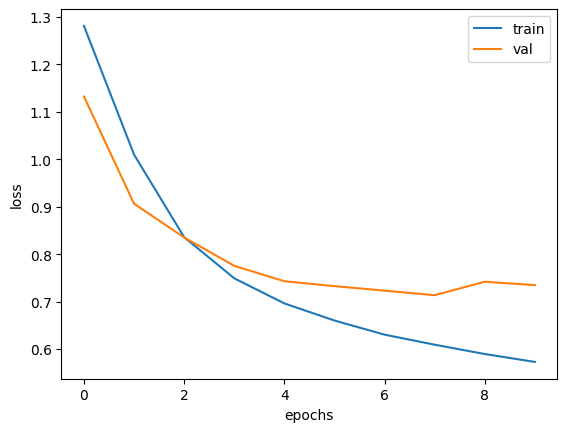

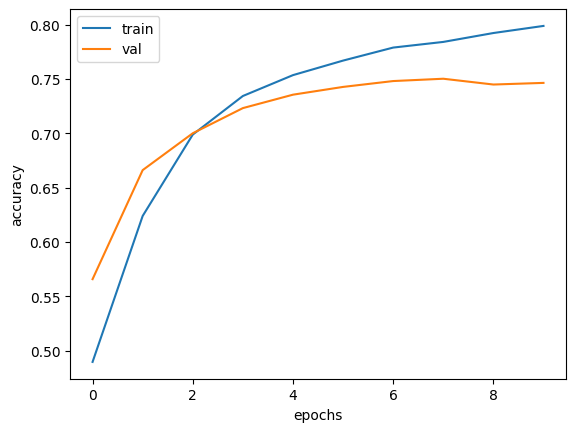

In [70]:
plt.plot(CNN_LSTM_model.history['loss'], label='train')
plt.plot(CNN_LSTM_model.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(CNN_LSTM_model.history['accuracy'], label='train')
plt.plot(CNN_LSTM_model.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [51]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, SpatialDropout1D, Dense, Flatten
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical

def create_model(optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(SpatialDropout1D(0.2))
    model.add(Flatten())
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'batch_size': [8, 64],
    'optimizer': ['adam', 'sgd'],
    'model__learning_rate': [0.001, 0.0001] 
}


model = KerasClassifier(model=create_model)



y_train_one_hot = to_categorical(y_train_new2, num_classes=6)
y_valid_one_hot = to_categorical(y_valid2, num_classes=6)

# Create GridSearchCV without batch_size
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search_result = grid_search.fit(x_train_new2, y_train_one_hot)


print("Best Parameters: ", grid_search_result.best_params_)
print("Best Accuracy: ", grid_search_result.best_score_)





/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.4646 - loss: 1.3244
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.4698 - loss: 1.3186
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.4695 - loss: 1.3196
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4693 - loss: 1.3153
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4651 - loss: 1.3273
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.4626 - loss: 1.3336
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4684 - loss: 1.3272
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.4784 - loss: 1.3161
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.4616 - loss: 1.3286
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.4632 - loss: 1.3332
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.3756 - loss: 1.4824
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3782 - loss: 1.4740
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3753 - loss: 1.4760
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.3738 - loss: 1.4778
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.3882 - loss: 1.4773
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.3742 - loss: 1.4899
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3719 - loss: 1.4911
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.3720 - loss: 1.4848
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3769 - loss: 1.4715
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.3807 - loss: 1.4761
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4238 - loss: 1.3971
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4233 - loss: 1.3940
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4257 - loss: 1.3992
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4240 - loss: 1.3932
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4232 - loss: 1.4057
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4177 - loss: 1.4097
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4184 - loss: 1.4071
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4358 - loss: 1.3931
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4276 - loss: 1.3994
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4279 - loss: 1.4030
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3240 - loss: 1.5913
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3223 - loss: 1.5698
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3211 - loss: 1.5849
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3302 - loss: 1.5628
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3338 - loss: 1.5590
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3143 - loss: 1.5886
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3233 - loss: 1.5868
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3241 - loss: 1.5742
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3289 - loss: 1.5756
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3223 - loss: 1.5740
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.4879 - loss: 1.2818
Best Parameters:  {'batch_size': 8, 'model__learning_rate': 0.001, 'optimizer': 'adam'}
Best Accuracy:  0.6642190680563784


# Training with CNN

In [67]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, SpatialDropout1D, Dense, Flatten
from keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train_new2, num_classes=6)
y_valid_one_hot = to_categorical(y_valid2, num_classes=6)

model2 = Sequential()

model2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 120)))

model2.add(MaxPooling1D(pool_size=2))

model2.add(SpatialDropout1D(0.2))

model2.add(Flatten())

model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
CNN_model =model2.fit(x_train_new2, y_train_one_hot, validation_data=(x_valid2, y_valid_one_hot), epochs=10, batch_size=8)


Epoch 1/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4223 - loss: 1.4235 - val_accuracy: 0.6229 - val_loss: 1.0452
Epoch 2/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6144 - loss: 1.0582 - val_accuracy: 0.6830 - val_loss: 0.9158
Epoch 3/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6635 - loss: 0.9513 - val_accuracy: 0.7002 - val_loss: 0.8560
Epoch 4/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6770 - loss: 0.9136 - val_accuracy: 0.7124 - val_loss: 0.8372
Epoch 5/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6895 - loss: 0.8755 - val_accuracy: 0.7234 - val_loss: 0.8242
Epoch 6/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6975 - loss: 0.8606 - val_accuracy: 0.7223 - val_loss: 0.8134
Epoch 7/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7066 - loss: 0.8358 - val_accuracy: 0.7230 - val_loss: 0.8185
Epoch 8/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7107 - loss: 0

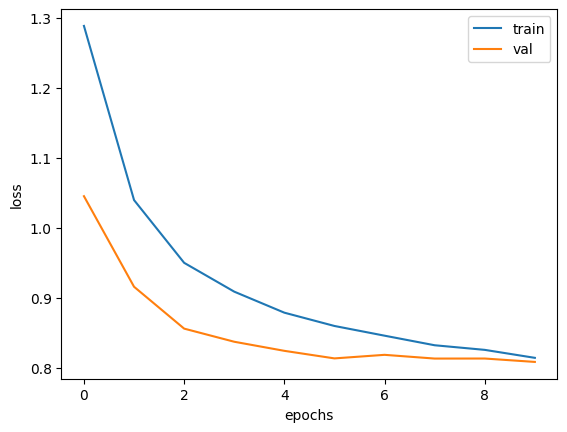

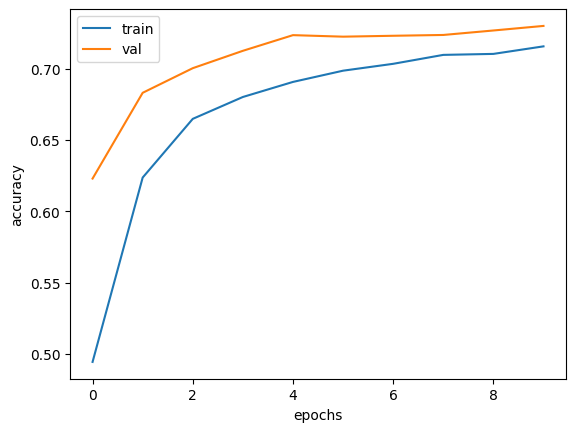

In [68]:
plt.plot(CNN_model.history['loss'], label='train')
plt.plot(CNN_model.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(CNN_model.history['accuracy'], label='train')
plt.plot(CNN_model.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

# training with out CNN layer

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, SpatialDropout1D, Dense
from keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train_new2, num_classes=6)
y_valid_one_hot = to_categorical(y_valid2, num_classes=6)

model3 = Sequential()
model3.add(LSTM(50, input_shape=(32, 120)))
model3.add(Dense(6, activation='softmax'))
adam_optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_model = model3.fit(x_train_new2, y_train_one_hot, validation_data=(x_valid2, y_valid_one_hot), epochs=10, batch_size=8)


Epoch 1/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.4850 - loss: 1.2820 - val_accuracy: 0.6866 - val_loss: 0.8644
Epoch 2/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7150 - loss: 0.7933 - val_accuracy: 0.7286 - val_loss: 0.7642
Epoch 3/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7574 - loss: 0.6834 - val_accuracy: 0.7389 - val_loss: 0.7354
Epoch 4/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7802 - loss: 0.6265 - val_accuracy: 0.7445 - val_loss: 0.7224
Epoch 5/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7974 - loss: 0.5803 - val_accuracy: 0.7449 - val_loss: 0.7354
Epoch 6/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8057 - loss: 0.5474 - val_accuracy: 0.7488 - val_loss: 0.7285
Epoch 7/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8156 - loss: 0.5278 - val_accuracy: 0.7435 - val_loss: 0.7391
Epoch 8/10
7968/7968 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8259 - loss: 0

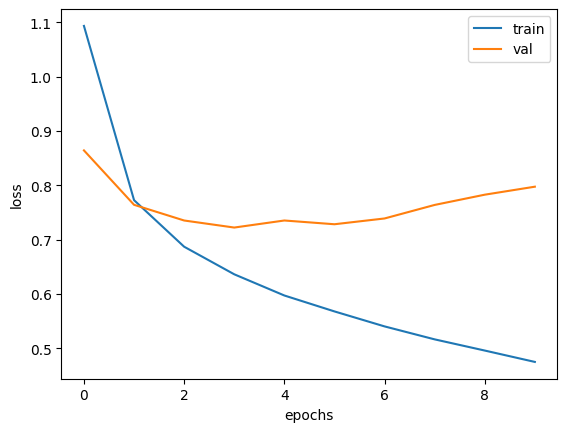

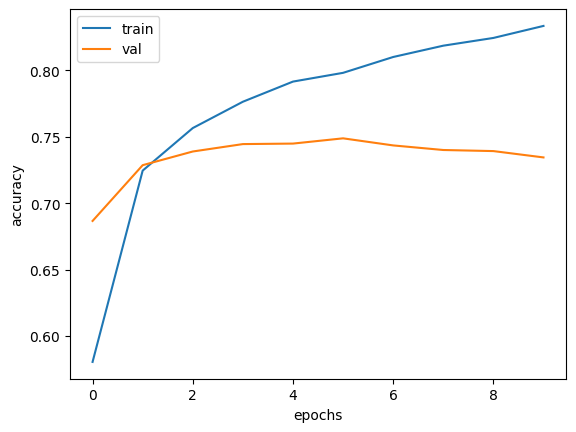

In [66]:
plt.plot(LSTM_model.history['loss'], label='train')
plt.plot(LSTM_model.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(LSTM_model.history['accuracy'], label='train')
plt.plot(LSTM_model.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

# Evaluation

In [77]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_probs = model3.predict(x_test2)

y_pred = np.argmax(y_pred_probs, axis=1)

score = accuracy_score(y_pred, y_test2)
print("Accuracy is equal to:", score)

1068/1068 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy is equal to: 0.7363612404462795


# accuracy for CNN model

In [78]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_probs2 = model2.predict(x_test2)

y_pred2 = np.argmax(y_pred_probs2, axis=1)

score = accuracy_score(y_pred2, y_test2)
print("Accuracy is equal to:", score)

1068/1068 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy is equal to: 0.7307388210489326


# accuracy for CNN_LSTM model

In [79]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_probs3 = model1.predict(x_test2)

y_pred3 = np.argmax(y_pred_probs3, axis=1)

score = accuracy_score(y_pred3, y_test2)
print("Accuracy is equal to:", score)

1068/1068 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy is equal to: 0.7461711909572755


# F1 score , Precision , Recall

In [83]:
from sklearn.metrics import classification_report
from numpy import argmax

y_pred_train3 = model3.predict(x_train_new2)
y_pred_valid3 = model3.predict(x_valid2)

y_pred_train_labels3 = argmax(y_pred_train3, axis=1)
y_pred_valid_labels3 = argmax(y_pred_valid3, axis=1)

y_true_train3 = argmax(y_train_one_hot, axis=1)
y_true_valid3= argmax(y_valid_one_hot, axis=1)

train_report3 = classification_report(y_true_train3 , y_pred_train_labels3)
valid_report3 = classification_report(y_true_valid3, y_pred_valid_labels3)

print('Training Set Classification Report:\n', train_report3)
print('Validation Set Classification Report:\n', valid_report3)


1992/1992 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     11198
           1       0.94      0.78      0.85       510
           2       0.93      0.81      0.87      9905
           3       0.86      0.84      0.85     15733
           4       0.80      0.91      0.85     19178
           5       0.91      0.79      0.85      7220

    accuracy                           0.85     63744
   macro avg       0.88      0.83      0.85     63744
weighted avg       0.86      0.85      0.85     63744

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2845
           1       0.78      0.60      0.67       146
           2       0.83      0.70      0.76      2493
           3       0.74      0.72      0.73      3790
           4       0.70   

In [87]:
from sklearn.metrics import classification_report
from numpy import argmax

y_pred_train_2 = model2.predict(x_train_new2)
y_pred_valid_2= model2.predict(x_valid2)

y_pred_train_labels_2 = argmax(y_pred_train_2, axis=1)
y_pred_valid_labels_2 = argmax(y_pred_valid_2, axis=1)

y_true_train2= argmax(y_train_one_hot, axis=1)
y_true_valid2= argmax(y_valid_one_hot, axis=1)

train_report2_ = classification_report(y_true_train2 , y_pred_train_labels_2)
valid_report2_= classification_report(y_true_valid2, y_pred_valid_labels_2)

print('Training Set Classification Report:\n', train_report2_)
print('Validation Set Classification Report:\n', valid_report2_)


1992/1992 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76     11198
           1       0.94      0.63      0.75       510
           2       0.90      0.74      0.81      9905
           3       0.77      0.78      0.77     15733
           4       0.68      0.85      0.76     19178
           5       0.88      0.70      0.78      7220

    accuracy                           0.77     63744
   macro avg       0.83      0.73      0.77     63744
weighted avg       0.79      0.77      0.77     63744

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      2845
           1       0.92      0.52      0.66       146
           2       0.86      0.71      0.78      2493
           3       0.72      0.73      0.73      3790
           4       0.64   

In [88]:
from sklearn.metrics import classification_report
from numpy import argmax

y_pred_train_1 = model1.predict(x_train_new2)
y_pred_valid_1= model1.predict(x_valid2)

y_pred_train_labels_1 = argmax(y_pred_train_1, axis=1)
y_pred_valid_labels_1 = argmax(y_pred_valid_1, axis=1)

y_true_train1= argmax(y_train_one_hot, axis=1)
y_true_valid1= argmax(y_valid_one_hot, axis=1)

train_report1_ = classification_report(y_true_train1 , y_pred_train_labels_1)
valid_report1_= classification_report(y_true_valid1, y_pred_valid_labels_1)

print('Training Set Classification Report:\n', train_report1_)
print('Validation Set Classification Report:\n', valid_report1_)


1992/1992 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     11198
           1       0.97      0.72      0.82       510
           2       0.81      0.86      0.83      9905
           3       0.80      0.83      0.81     15733
           4       0.85      0.80      0.83     19178
           5       0.85      0.78      0.81      7220

    accuracy                           0.82     63744
   macro avg       0.84      0.80      0.82     63744
weighted avg       0.82      0.82      0.82     63744

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      2845
           1       0.96      0.65      0.78       146
           2       0.74      0.81      0.77      2493
           3       0.73      0.76      0.74      3790
           4       0.79   

# aproach Bag of words